In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import math

import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [95]:
df_f = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3차프로젝트/5.키성장예측/BA_df_f.csv')

In [96]:
def df_base(df):
  df_f = df
  m_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3차프로젝트/1.원본/BA(Male).xlsx')
  f_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3차프로젝트/1.원본/BA(Female).xlsx')  
  
  m_df = m_df[['No.','성별','신장']]
  f_df = f_df[['No.','성별','신장']]

  m_df['No.'] = range(1, len(m_df)+1)
  f_df['No.'] = range(1, len(f_df)+1)

  m_df['성별'] = 0
  f_df['성별'] = 1

  df_base = pd.concat([m_df,f_df],ignore_index=True)
  df_base.columns = ['No','gender','current_height']
  BA_df_f = pd.merge(df_f,df_base, on=['No','gender'], how='inner')
  return BA_df_f

In [97]:
BA_df_f = df_base(df_f)
BA_df_f

,No,gender,BA_mean,CARPAL,TMCP,MMCP,LMCP,IP,MPIP,LPIP,img_path,BA_pred,current_height
0,1,0,4.1,"[0.413333, 0.70375, 0.46, 0.295]","[0.724167, 0.493125, 0.121667, 0.08625]","[0.42, 0.379375, 0.106667, 0.11875]","[0.174167, 0.45375, 0.125, 0.1]","[0.815, 0.40625, 0.0866667, 0.07]","[0.414167, 0.223125, 0.105, 0.07375]","[0.0841667, 0.346875, 0.095, 0.05625]",/content/drive/MyDrive/Colab Notebooks/3차프로...,4.193449,92.6
1,2,0,2.6,"[0.5864666666666667, 0.759375, 0.5354166666666...","[0.8302166666666667, 0.52735, 0.13958333333333...","[0.4864666666666666, 0.4445375, 0.13125, 0.157...","[0.2354166666666666, 0.5398499999999999, 0.158...","[0.8166666666666667, 0.4086, 0.1125, 0.0859375]","[0.4406333333333333, 0.246875, 0.1354166666666...","[0.1416666666666666, 0.4078125, 0.1125, 0.071875]",/content/drive/MyDrive/Colab Notebooks/3차프로...,3.089182,89.2
2,3,0,4.2,"[0.5552166666666667, 0.7070375, 0.41875, 0.242...","[0.81875, 0.5328125, 0.1208333333333333, 0.09375]","[0.4906333333333333, 0.4320375, 0.110416666666...","[0.29375, 0.50625, 0.1208333333333333, 0.090625]","[0.90625, 0.4546875, 0.0833333333333333, 0.0625]","[0.4833333333333333, 0.27735, 0.1, 0.0859375]","[0.2, 0.4109375, 0.0958333333333333, 0.059375]",/content/drive/MyDrive/Colab Notebooks/3차프로...,4.278206,90.8
3,4,0,1.8,"[0.5770833333333333, 0.6539125, 0.425, 0.2984375]","[0.7979166666666667, 0.4382875, 0.125, 0.0984375]","[0.4416666666666666, 0.3828125, 0.1375, 0.121875]","[0.2573, 0.4961, 0.1520833333333333, 0.1046875]","[0.85105, 0.3382875, 0.0979166666666666, 0.085...","[0.3854166666666667, 0.2211, 0.125, 0.0890625]","[0.1552166666666666, 0.3914125, 0.114583333333...",/content/drive/MyDrive/Colab Notebooks/3차프로...,1.658265,91.1
4,5,0,3.1,"[0.5375, 0.754375, 0.505, 0.32625]","[0.803333, 0.495, 0.11, 0.09]","[0.465, 0.415625, 0.113333, 0.12625]","[0.245, 0.52875, 0.12, 0.0875]","[0.855833, 0.3775, 0.0983333, 0.0725]","[0.449167, 0.233125, 0.108333, 0.08125]","[0.133333, 0.41625, 0.0933333, 0.0675]",/content/drive/MyDrive/Colab Notebooks/3차프로...,3.071634,93.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,568,1,16.0,"[0.470833, 0.681875, 0.405, 0.22875]","[0.78, 0.5075, 0.13, 0.0925]","[0.460833, 0.37875, 0.118333, 0.1]","[0.23, 0.436875, 0.12, 0.09375]","[0.870833, 0.406875, 0.095, 0.07375]","[0.464167, 0.206875, 0.118333, 0.07875]","[0.150833, 0.315, 0.118333, 0.0675]",/content/drive/MyDrive/Colab Notebooks/3차프로...,16.094114,150.6
1233,569,1,15.5,"[0.459167, 0.684375, 0.351667, 0.21625]","[0.739167, 0.509375, 0.128333, 0.09125]","[0.433333, 0.3725, 0.11, 0.07]","[0.248333, 0.44875, 0.09, 0.0725]","[0.845833, 0.415625, 0.095, 0.07375]","[0.413333, 0.20875, 0.103333, 0.08]","[0.154167, 0.346875, 0.111667, 0.06125]",/content/drive/MyDrive/Colab Notebooks/3차프로...,15.965637,152.2
1234,570,1,15.2,"[0.53, 0.71625, 0.39, 0.2125]","[0.790833, 0.51875, 0.121667, 0.09]","[0.4925, 0.394375, 0.111667, 0.08875]","[0.303333, 0.510625, 0.113333, 0.08625]","[0.871667, 0.410625, 0.09, 0.06875]","[0.510833, 0.22375, 0.101667, 0.085]","[0.18, 0.405, 0.0866667, 0.075]",/content/drive/MyDrive/Colab Notebooks/3차프로...,15.327578,157.5
1235,571,1,16.5,"[0.495, 0.77375, 0.3, 0.23]","[0.755, 0.60625, 0.116667, 0.095]","[0.5175, 0.428125, 0.095, 0.09125]","[0.324167, 0.505625, 0.115, 0.09375]","[0.855, 0.496875, 0.0966667, 0.07625]","[0.579167, 0.250625, 0.0983333, 0.08125]","[0.22, 0.405, 0.113333, 0.075]",/content/drive/MyDrive/Colab Notebooks/3차프로...,16.674793,153.1


# 키 성장 예측

In [139]:
# 1. 성장도표 불러오기
growth_chart = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3차프로젝트/1.원본/성장도표_데이터테이블(엑셀자료).xls', header=[0,1])
growth_chart.columns = ['gender','age_year','age_month','L','M','S'] + growth_chart.columns[6:].get_level_values(1).tolist()
growth_chart = growth_chart.iloc[:,:19]
for i in range(0,228,12):
  growth_chart['age_year'][i:i+12] = growth_chart['age_year'][i]
for i in range(228,456,12):
  growth_chart['age_year'][i:i+12] = growth_chart['age_year'][i]

growth_chart['age_year'] = growth_chart['age_year'].astype(int)

In [136]:
growth_chart

,gender,age_year,age_month,L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th
0,1,0,0,1.0000,49.8842,0.0380,45.5,46.3,46.8,47.5,47.9,48.6,49.9,51.2,51.8,52.3,53.0,53.4,54.3
1,1,0,1,1.0000,54.7244,0.0356,50.2,51.1,51.5,52.2,52.7,53.4,54.7,56.0,56.7,57.2,57.9,58.4,59.3
2,1,0,2,1.0000,58.4249,0.0342,53.8,54.7,55.1,55.9,56.4,57.1,58.4,59.8,60.5,61.0,61.7,62.2,63.1
3,1,0,3,1.0000,61.4292,0.0333,56.7,57.6,58.1,58.8,59.3,60.1,61.4,62.8,63.5,64.0,64.8,65.3,66.2
4,1,0,4,1.0000,63.8860,0.0326,59.0,60.0,60.5,61.2,61.7,62.5,63.9,65.3,66.0,66.6,67.3,67.8,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,18,223,-0.4881,160.8981,0.0308,149.9,152.0,153.0,154.7,155.9,157.6,160.9,164.3,166.2,167.4,169.4,170.6,173.1
452,2,18,224,-0.4959,160.9372,0.0308,150.0,152.0,153.1,154.8,155.9,157.6,160.9,164.3,166.2,167.5,169.4,170.7,173.1
453,2,18,225,-0.5037,160.9762,0.0307,150.1,152.1,153.1,154.8,156.0,157.7,161.0,164.4,166.2,167.5,169.4,170.7,173.1
454,2,18,226,-0.5116,161.0153,0.0307,150.1,152.1,153.2,154.9,156.0,157.7,161.0,164.4,166.3,167.5,169.5,170.7,173.2


In [93]:
# 2. 18세기준 최종 키 예측 함수
def height_prediction(gender, BA, current_height):

  ## 1) 나이를 개월수로 변환
  ### math.modf: 숫자의 정수와 소숫점 부분을 구분하여 줌
  b_year_dp, b_year = math.modf(BA)
  m_age = (b_year * 12) + (b_year_dp * 12)

  ## 2) 성별에 따라 table 다르게 불러오기
  if gender == 0:
    target = growth_chart.query(f"gender == 1 & age_month	== {int(m_age)}")
    fomular_18 = growth_chart.query("gender == 1 & age_month == 227")
  
  elif gender == 1:
    target = growth_chart.query(f"gender == 2 & age_month	== {int(m_age)}")
    fomular_18 = growth_chart.query("gender == 2 & age_month == 227") 

  ## 3) 예측 대상의 LMS 구하기    
  L = target['L'].values[0]
  M = target['M'].values[0]
  S = target['S'].values[0]

  ## 4) 신장 예측 공식에 사용되는 18세의 LMS 구하기
  L_18 = fomular_18['L'].values[0]
  M_18 = fomular_18['M'].values[0]
  S_18 = fomular_18['S'].values[0]

  ## 5) 키 예측
  if L != 0:
    z_score = (((current_height/M)**L) - 1) / (L*S)
    prediction = M_18 * (1+ L_18 * S_18 * z_score)**(1/L_18)
    return prediction

  else:
    z_score = int(np.log(current_height/M)) / S
    prediction = M_18 * np.exp(S_18 *z_score)
    return prediction

In [94]:
height_prediction(1, 3.16560, 93.0)

157.40333227199108

## 데이터 프레임에 최종 예측 키 추가

In [98]:
def height_prediction_df(df_f, g, a, h):
  df = df_f.copy()
  predictions = []
  for i in range(len(df)):
    gender = df.loc[i, g]
    BA = df.loc[i, a]
    current_height = df.loc[i, h]

    predictions.append(height_prediction(gender, BA, current_height))
  
  df['height_pred'] = predictions
  return df

In [99]:
H_df = height_prediction_df(BA_df_f,'gender','BA_pred','current_height')

In [100]:
H_df.groupby('gender')[['height_pred']].mean()

,height_pred
gender,
0,171.907048
1,156.063906


# 의사 진료 데이터 비교

In [101]:
H_df2 = height_prediction_df(BA_df_f,'gender','BA_mean','current_height')

In [102]:
H_df2.groupby('gender')[['height_pred']].mean()

,height_pred
gender,
0,171.661381
1,156.172627


In [103]:
H_df.to_csv('/content/drive/MyDrive/Colab Notebooks/3차프로젝트/5.키성장예측/H_df_f.csv',index=False)

## 이상치 제거

In [104]:
H_df.query('height_pred<120')

,No,gender,BA_mean,CARPAL,TMCP,MMCP,LMCP,IP,MPIP,LPIP,img_path,BA_pred,current_height,height_pred
771,107,1,5.8,"[0.510833, 0.715625, 0.425, 0.26625]","[0.764167, 0.51125, 0.101667, 0.08]","[0.463333, 0.39125, 0.106667, 0.1225]","[0.263333, 0.486875, 0.11, 0.09875]","[0.844167, 0.406875, 0.0916667, 0.06625]","[0.451667, 0.22875, 0.103333, 0.08]","[0.149167, 0.39125, 0.0883333, 0.06]",/content/drive/MyDrive/Colab Notebooks/3차프로...,5.686822,57.7,101.763848


In [105]:
H_df.drop(771, axis=0,inplace=True)

In [106]:
H_df.groupby('gender')[['height_pred']].mean()

,height_pred
gender,
0,171.907048
1,156.159003


# 시각화

In [107]:
male = H_df.query("gender == 0")['height_pred']
female = H_df.query("gender == 1")['height_pred']

In [108]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=male, name = 'male'))
fig.add_trace(go.Histogram(x=female, name = 'female'))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig.show()

In [109]:
hist_data = [male, female]
group_labels = ['male', 'female']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

## 키 성장 도표 그래프로 확인

In [142]:
def height_graph(growth_chart, gender, BA, Height, col_range = 13):
  chart = growth_chart.copy()
  chart.set_index('age_year',inplace=True)

  # 1. 남여 구분
  m_chart = chart[:228]
  f_chart = chart[228:]

  # 2. 36개월(3세)부터 확인
  m_3to18 = m_chart[m_chart.index >= 3]  
  f_3to18 = f_chart[f_chart.index >= 3]  

  # 키 예측
  Pred_Height = height_prediction(gender, BA, Height)
  print('▶ 최종 예측 키 :',Height, '→', round(Pred_Height,1))
  
  ## 남자
  if gender == 0 :
      df = m_3to18
      palette_color = 'YlGn'
  ## 여자
  elif gender == 1 :
      df = f_3to18
      palette_color = 'Reds'

  ## 백분위 범위
  if col_range == 13 :
    columns = df.columns[6:]
  elif col_range == 3 :
    columns = ['3rd','50th','97th']

  ## Graph
  plt.figure(figsize= (10,14))
  sns.lineplot(data = df[columns], palette=palette_color, dashes = False)
  plt.grid(linestyle='--',color='k',linewidth=0.5)
  plt.legend(loc='upper left')
  plt.ylabel('Height')

  ## Current value Marking option
  plt.axvline(BA,color='k',linestyle='--', linewidth = 1.2)       # y line
  plt.axhline(Height,color='k',linestyle='--', linewidth = 1.2)   # x line
  plt.plot(BA, Height, marker="o", markersize=6, color="k")       # value marking
  plt.text(x=BA+1, y=Height-5, s=(f' Current Height  \n [ {BA} Y, {Height} cm ]'), alpha=1, color='k', fontsize = 15)
  
  ## Prediction value Marking option
  plt.axvline(18, color='r',linestyle='--', linewidth = 1.2)
  plt.axhline(Pred_Height,color='r',linestyle='--', linewidth = 1.2)
  plt.plot(18, Pred_Height, marker="o", markersize=6, color="r")
  plt.text(x=18-11, y=Pred_Height+5, s=(f' Prediction Height  \n [ {BA} Y, {round(Pred_Height,1)} cm ]'), alpha=1, color='r', fontsize = 15)

  ## Display range option
  plt.xticks(ticks = range(3,19))
  plt.yticks(ticks = range(80,201,10))
  for i in columns:
    plt.text(x=19, y=df[f'{i}'].iloc[-1]-0.5, s=f'{i}', alpha=1, color='#438cb9', fontsize=9)

▶ 최종 예측 키 : 96.3 → 161.5


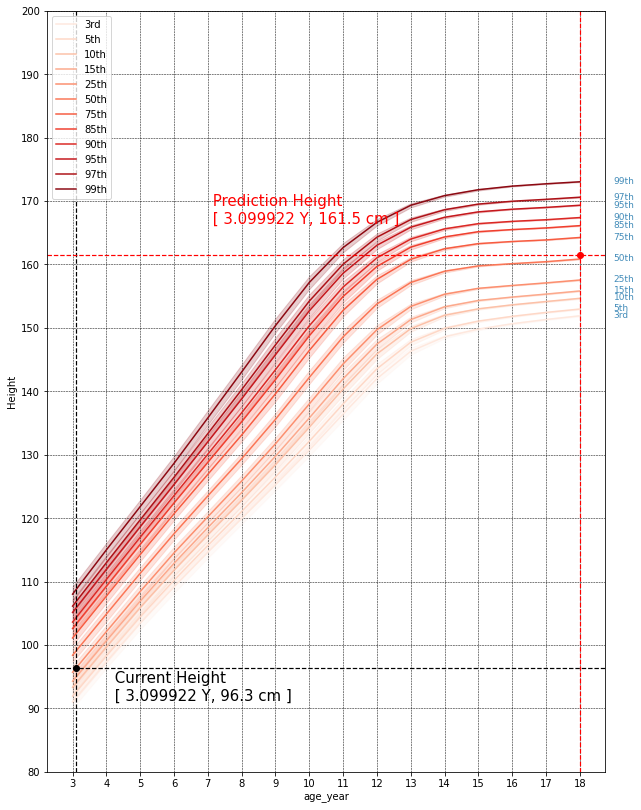

In [143]:
# 여자 25번 키 예측 도표 
height_graph(growth_chart, 1, 3.099922, 96.3, col_range = 13)	

▶ 최종 예측 키 : 117.9 → 178.1


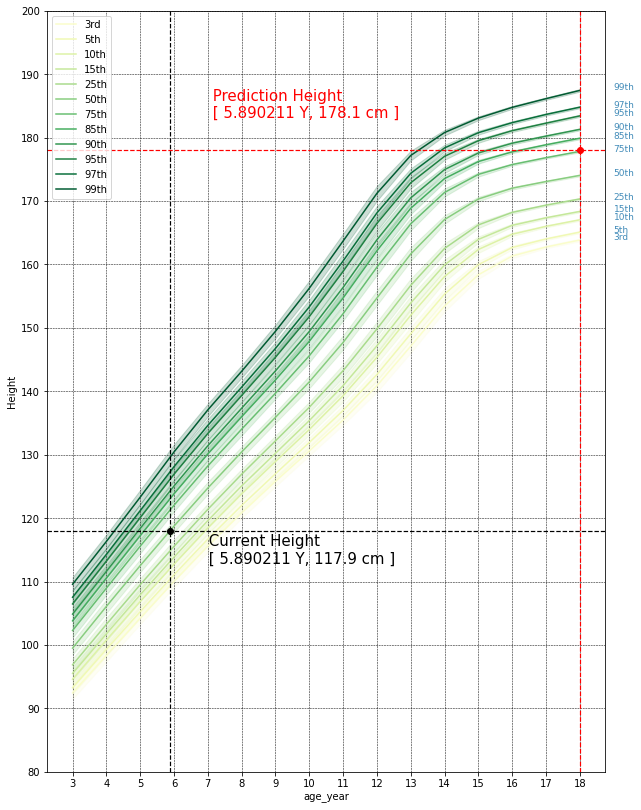

In [144]:
# 남자 221번 키 예측 도표
height_graph(growth_chart, 0, 5.890211, 117.9, col_range = 13)